# Regresión Lineal

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [38]:
lista_alumnos = [("Leonardo S", 24, 1.82),
                 ("Piero T", 25, 1.71),
                 ("Marta B", 35, 1.66),
                 ("Silvia P", 37, 1.63),
                 ("Faro Z", 29, 1.90),
                 ("Miguel N", 27, 1.80),
                 ("Alejandro M", 28, 1.70),
                 ("Cristina M", 32, 1.60),
                 ("Francisco P", 36, 1.74),
                 ("Jorge D", 45, 1.72),
                 ("Jesús L", 41, 1.65),
                 ("Marta G", 30, 1.65),
                 ("Jennifer S", 40, 1.60),
                 ("Diego I", 39, 1.80),
                 ("Antonio C", 23, 1.77),
                 ("Juan M", 32, 1.75),
                 ("David S", 27, 1.70),
                 ("Antonio J", 34, 1.80),
                 ("Carlos H", 27, 1.77),
                 ("Erik U", 28, 1.70),
                 ("Marcos L", 35, 1.80)]

In [39]:
len(lista_alumnos)

21

#### 1. Crea un dataframe

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data_height = pd.DataFrame(lista_alumnos, columns=['name','age','height'])

In [42]:
data_height

,name,age,height
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90
5,Miguel N,27,1.80
6,Alejandro M,28,1.70
7,Cristina M,32,1.60
8,Francisco P,36,1.74
9,Jorge D,45,1.72


#### 2. Realiza un breve análisis exploratorio de los datos

In [43]:
data_height.describe()

,age,height
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


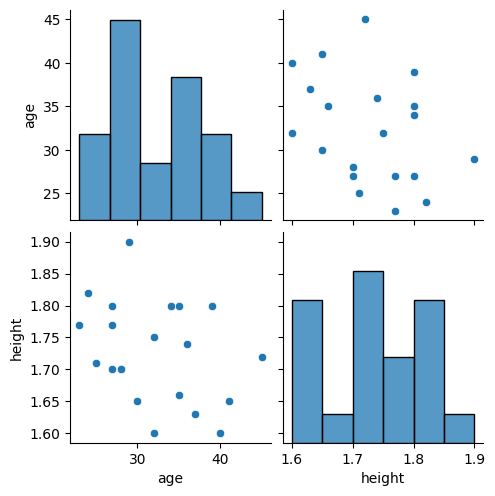

In [44]:
sns.pairplot(data_height);

In [45]:
data_height.corr(numeric_only=True)

,age,height
age,1.000000,-0.329275
height,-0.329275,1.000000


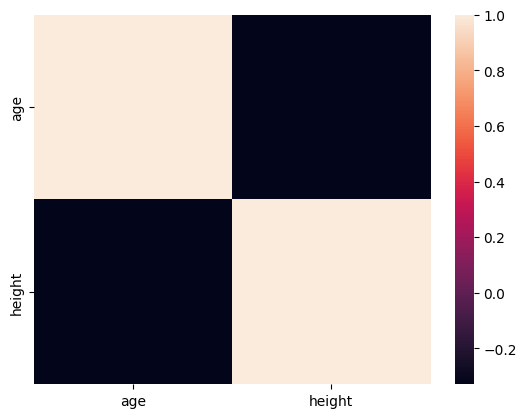

In [46]:
sns.heatmap(data_height.corr(numeric_only=True));

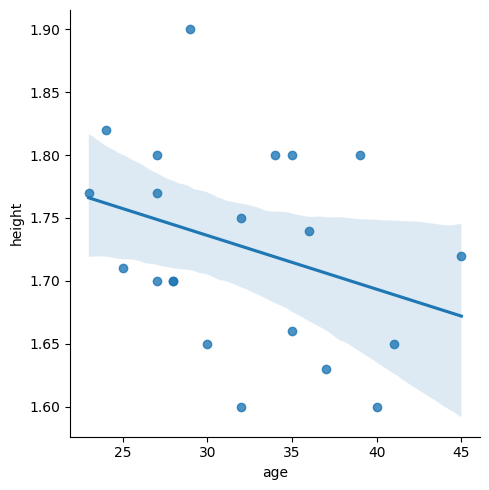

In [47]:
#Regresion lineal con Seaborn
sns.lmplot(x = "age", y = "height", data = data_height);

#### 3. Divide el dataset para el entrenamiento

In [48]:
y = data_height.height
x = data_height.age

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [50]:
display(x_train, y_train)

3     37
19    28
6     28
12    40
17    34
20    35
8     36
10    41
1     25
13    39
16    27
0     24
15    32
4     29
9     45
Name: age, dtype: int64

3     1.63
19    1.70
6     1.70
12    1.60
17    1.80
20    1.80
8     1.74
10    1.65
1     1.71
13    1.80
16    1.70
0     1.82
15    1.75
4     1.90
9     1.72
Name: height, dtype: float64

In [51]:
x_train = x_train.array.reshape(-1, 1)

<NumpyExtensionArray>
[
[37],
[28],
[28],
[40],
[34],
[35],
[36],
[41],
[25],
[39],
[27],
[24],
[32],
[29],
[45]
]
Shape: (15, 1), dtype: int64

In [16]:
display(x_test, y_test)

14    23
5     27
2     35
11    30
7     32
18    27
Name: age, dtype: int64

14    1.77
5     1.80
2     1.66
11    1.65
7     1.60
18    1.77
Name: height, dtype: float64

In [17]:
x_test = x_test.array.reshape(-1, 1)

#### 4. Entrena tu modelo

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [26]:
lm.fit(x_train, y_train)

LinearRegression()

y(Altura) = 1.87 - 0.004 * x1(Edad)
```
x = 0; y = 1.87
x = 1; y = 1.866
x = 2; y = 1.862
x = 40; y = 1.71
```

#### 5. Obtén predicciones con el test

In [27]:
y_test

14    1.77
5     1.80
2     1.66
11    1.65
7     1.60
18    1.77
Name: height, dtype: float64

In [28]:
predictions = lm.predict(x_test)
predictions

array([1.7764719 , 1.76028923, 1.72792389, 1.74815222, 1.74006089,
       1.76028923])

In [29]:
print(lm.coef_)
print(lm.intercept_)

[-0.00404567]
1.8695222482435596


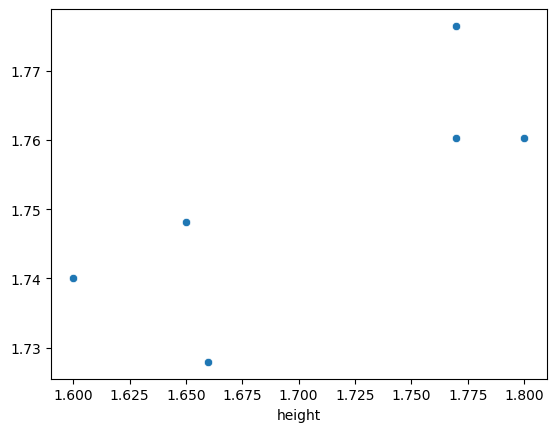

In [30]:
sns.scatterplot(x = y_test, y = predictions);

#### 6. Evalúa tu modelo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15080\2654621694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=5);


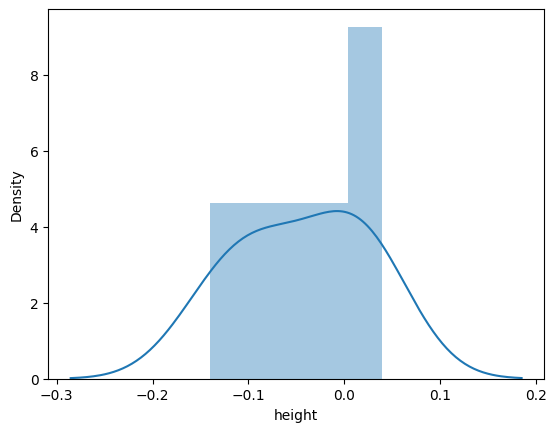

In [34]:
sns.distplot((y_test - predictions), bins=5);

In [32]:
from sklearn import metrics

lm.score(x_test, y_test)

-0.06254942765180171

In [33]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAPE: 0.03652442489947345
MAE: 0.06033840749414521
MSE: 0.00592961611153464
RMSE: 0.07700400062032257


#### 7. Representa tus predicciones en una gráfica.